# 1.5 决策理论

假设我们的输入向量为 $\mathbf x$，目标向量为 $\mathbf t$，对于回归问题，$\mathbf t$ 是一个连续变量，对于分类问题，$\mathbf t$ 是一个离散变量。联合分布 $p(\mathbf{x, t})$ 反映了这些变量之间的不确定性关系，而使用训练数据求 $p(\mathbf{x, t})$ 作为一种统计推断的过程，通常是十分困难的。

考虑一个医学诊断的例子，假设我们对病人进行了 X 光检查，希望判断病人是否得了癌症。这里，输入 $\mathbf x$ 是 X 光检查的图像，输入是一个标签 $t\in \{0,1\}$，$t=0$ 表示 $\mathcal C_1$类，有癌症，$t=1$ 表示 $\mathcal C_2$类，没有癌症。

我们要计算的分布为 $p(\mathbf{x, t})$ 或者 $p(\mathbf{x}, \mathcal{C}_k)$。

给定一个输入 $\mathbf x$，我们需要判断它属于每一类的概率，即计算后验概率

$$
p(\mathcal C_k|\mathbf x)=\frac{p(\mathbf x|\mathcal C_k) p(\mathcal C_k)}{p(\mathbf x)}
$$

## 1.5.1 最小错误率决策 

假设我们的目标是最小化发生错误的概率。

我们需要决定一个准则来决定每个 $\mathbf x$ 所属的类别。这个准则将空间分成了很多个区域 $\mathcal R_k$，每个区域代表一类，表示落在这个区域的点都被标记成了第 $k$ 类。这些区域的边界被叫做决策面（`decision boundaries`）。注意，这些决策区域并不一定需要联系，可能是多个区域的组合成为一类的决策区域。

我们的例子中，错误发生有两种情况：属于 $\mathcal C_1$ 被分为 $\mathcal C_2$ 和属于 $\mathcal C_2$ 被分为 $\mathcal C_1$，因此错误率为

$$
p(mistake) = p(\mathbf x\in \mathcal R_1, \mathcal C_2) + p(\mathbf x\in \mathcal R_2, \mathcal C_1)
= \int_{\mathcal R_1} p(\mathbf x, \mathcal C_2) d\mathbf x + \int_{\mathcal R_2} p(\mathbf x, \mathcal C_1) d\mathbf x
$$

为了最小化错误率，我们需要将 $x$ 标记为概率最大的那个类，即如果 $p(\mathbf x, \mathcal C_1)>p(\mathbf x, \mathcal C_2)$，那么将 $\mathbf x$ 标记为 $\mathcal C_1$

从乘法法则我们知道 $p(\mathbf x, \mathcal C_k)=p(\mathcal C_k|\mathbf x)p(\mathbf x)$，而 $p(\mathbf x)$ 是公共项，因此我们相当于将 $\mathbf x$ 标记为 $p(\mathcal C_k|\mathbf x)$ 最大的类。

对于多类问题，最小化错误率决策可以看出最大化正确率决策，即

$$
p(correct) = \sum_{k=1}^K p(\mathbf x\in \mathcal R_k, \mathcal C_k) = \sum_{k=1}^K \int_{\mathcal R_k} p(\mathbf x, \mathcal C_k) d\mathbf x
$$

下图了说明最小化错误率的原理。

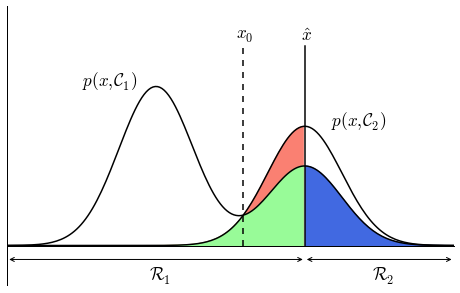

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

xx = np.linspace(-6, 6, 200)
yy_1 = 2 * norm.pdf(xx, loc= -2) + norm.pdf(xx, loc = 2)
yy_2 = 1.5 * norm.pdf(xx, loc = 2) 

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xx, yy_1, 'k', xx, yy_2, 'k', linewidth=1.5)
ax.set_ylim(-.2, 1.2)
ax.set_xticks([])
ax.set_yticks([])
ax.plot([0.33, 0.33], [0, 1], 'k--',linewidth=1.5)
ax.plot([2, 2], [0, 1], 'k-', linewidth=1.5)
ax.fill_between(xx[xx < 2], yy_2[xx <= 2], color="salmon")
ax.fill_between(xx[xx < 2], np.min(np.vstack([yy_1[xx < 2], yy_2[xx < 2]]), axis=0), color="palegreen")
ax.fill_between(xx[xx > 2], yy_1[xx > 2], color="royalblue")
ax.text(-4, 0.8, r"$p(x, \mathcal{C}_1)$", fontsize="xx-large")
ax.text(2.7, 0.6, r"$p(x, \mathcal{C}_2)$", fontsize="xx-large")
ax.text(0.15, 1.04, r"$x_0$", fontsize="xx-large")
ax.text(1.9, 1.03, r"$\hat{x}$", fontsize="xx-large")
ax.annotate("",
            xy=(-6, -0.07), xycoords='data',
            xytext=(2, -0.07), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), 
            )
ax.annotate("",
            xy=(2, -0.07), xycoords='data',
            xytext=(6, -0.07), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"), 
            )
ax.text(-2.2, -0.17, '$\mathcal{R}_1$', fontsize="xx-large")
ax.text(3.8, -0.17, '$\mathcal{R}_2$', fontsize="xx-large")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.spines['bottom'].set_position(('data',0))

plt.show()

如图所示，假设决策分界面为 $x=\hat{x}$，在决策面左边的点 $x\geq \hat x$ 分为 $\mathcal C_1$，右边的点为 $\mathcal C_2$ 类。从图中可以看到，彩色的部分都是错误的区域。绿色部分和红色部分表示属于 $\mathcal C_2$ 被错分为 $\mathcal C_1$ ，蓝色部分表示属于 $\mathcal C_1$ 被错分为 $\mathcal C_2$。

如果我们改变 $\hat x$ 的值，红色和绿色的部分的总和始终保持不变，而变化的是红色的部分的面积。从图中可以看出，当决策面 $x=x_0$ 即两条概率曲线的交点时，红色部分的面积为 `0`，此时对应的错误率（彩色面积总和）最小。

## 1.5.2 最小风险决策

在很多情况下，我们的目标要更为复杂。

对于癌症检测的问题，如果一个没有癌症的患者被判断得了癌症，那么结果很可能只是多进行一系列进一步检查以确认；但是如果一个有癌症的患者被判断没有癌症，那么结果很可能是因为没有得到及时治疗而死亡。因此，这两种错误的结果是不一样的，在癌症的样例下，我们更希望第二种错误的样例要更少一些，即使第一种错误会相对增加。

为了量化这种目标，我们引入损失函数（`loss (cost) function`），用来衡量每一种类型的决策所带来的损失。这样我们的目标就变成了最小化损失函数，具体来说，对于一个新来的 $\mathbf x$，其类别为 $\mathcal C_k$，我们的决策将其分为 $\mathcal C_j$ 类（$j$ 可以与 $k$ 相等），我们用 $L_{kj}$ 表示这种决策的损失，例如，在癌症的例子中，我们的 $L$ 矩阵可以被表示为：

| | $\mathcal C_1$ cancer | $\mathcal C_2$ normal |
| --- | --- | --- |
|**$\mathcal C_1$ cancer** | 0 | 1000 |
|**$\mathcal C_2$ normal** | 1 | 0 |

表示如果一个有癌症的被判做没有的损失是 1000，而没有癌症的判做癌症的损失为 1。

为了优化目标函数，我们需要知道给定 $\mathbf x$ 的真实类别，但是这个类别不是确定的，而是由分布 $p(\mathbf x, \mathcal C_k)$ 所决定的，因此，我们转而优化损失的期望：

$$
\mathbb E[L] = \sum_k \sum_j \int_{\mathcal R_j} L_{kj} p(\mathbf x, \mathcal C_k) d\mathbf x
$$

我们的目标是选择决策区域 $\mathcal R_j$ 使得期望最小化。

换句话说，我们对 $\mathbf x$ 决策会使得 $\sum_{k} L_{kj} p(\mathbf x, \mathcal C_k)$ 最小，即 $\sum_{k} L_{kj} p(\mathcal C_k | \mathbf x)$ 最小。

## 1.5.3 拒绝选项

当有多个 $p(\mathcal C_k | \mathbf x)$ 值十分接近时，决策将变得十分困难。

在某些情况下，我们可以选择拒绝做出判断，即拒绝选项（`reject option`）。例如在癌症的例子中，如果机器对决策是否有癌症有困难，那么更好的方法是不做出决策，而让人类专家去处理。

为了达到这个目的，我们可以设定一个阈值 $\theta$，当最大的一个 $p(\mathcal C_k | \mathbf x)$ 值小于 $\theta$ 时，拒绝做出判断。



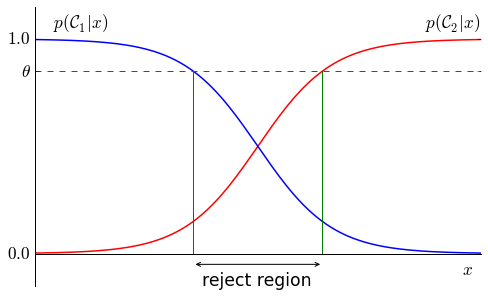

In [2]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

xx = np.linspace(-6, 6, 200)
yy = sigmoid(xx)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xx, yy, 'r', xx, 1 - yy, 'b', linewidth=1.5)
ax.set_xticks([])
ax.set_ylim([-0.15, 1.15])
ax.set_yticks([0, 0.85, 1])
ax.set_yticklabels(["$0.0$", r'$\theta$', "$1.0$"], fontsize="xx-large")

ax.plot([-1.73, -1.73], [0, 0.85], "g")
ax.plot([1.73, 1.73], [0, 0.85], "g")
ax.plot([-6, 6], [0.85, 0.85], "g--")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.spines['bottom'].set_position(('data',0))

ax.annotate("",
            xy=(1.73, -0.05), xycoords='data',
            xytext=(-1.73, -0.05), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"))

ax.text(-5.5, 1.05, '$p(\mathcal{C}_1|x)$', fontsize="xx-large")
ax.text(4.5, 1.05, '$p(\mathcal{C}_2|x)$', fontsize="xx-large")
ax.text(-1.5, -0.15, "reject region", fontsize="xx-large")
ax.text(5.5, -0.1, "$x$", fontsize="xx-large")

plt.show()

如果设置 $\theta = 1$，那么所有的区域都会被拒绝。如果设置 $\theta < 1/K$，其中 $K$ 是类别数，那么所有的区域都不会被拒绝。

## 1.5.4 推断和决策

我们之前事实上将分类问题分成了两部分：
- 推断部分：使用训练数据建立一个计算 $p(\mathcal{C}_k|\mathbf x)$ 的模型
- 决策部分：使用这些后验概率进行决策

另一种直接的方法是学习一个将输入 $\mathbf x$ 直接映射为决策的函数，这样的函数叫做判别函数（`discriminant function`）。

事实上，我们有三类不同的方法来解决分类问题，按复杂度从高到低排列如下：

1. 建模计算 $p(\mathbf x, \mathcal{C}_k)$，再决策，产生式模型（`generative models`）
- 建模计算 $p(\mathcal{C}_k|\mathbf x)$，再决策，判别式模型（`discriminative models`）
- 直接使用判别函数 $f(\mathbf x)$ 映射到标签类别上，例如二类问题中 $f=0$ 表示 $\mathcal C_1$， $f=1$ 表示 $\mathcal C_2$。

### 比较

方法 1 复杂度最高，通常 $\mathbf x$ 是很高维的数据，因此我们需要很多的数据来保证分布的正确性；$p(\mathcal C_k)$ 通常只是简单的使用训练集的分布决定。其好处在于可以得到 $p(\mathbf x)$，来判断一个新数据点 $\mathbf x$ 在当前模型下的概率，即离群点检测（`outlier detection`）。

如果我们只关注分类决策，那么方法 2 是一个好的选择，因为不需要计算 $p(\mathbf x)$，计算量减少了很多；

方法 3 直接将决策并入了判别函数，比方法 2 更简单。但是我们不再有后验概率的信息。

有后验概率的好处在于：
- 最小风险决策
- 拒绝选项
- 补偿先验概率不均衡的问题
- 结合多个模型

## 1.5.5 回归问题的损失函数

对于回归问题，设输入为 $\mathbf x$，目标值为 $t$，模型输出为 $y(\mathbf x)$，我们的损失函数定义为 $L(t, y(\mathbf x))$，则其期望为：

$$
\mathbb E[L] = \iint L(t, y(\mathbf x)) p(\mathbf x, t)d\mathbf xdt
$$

使用平方误差 $L(t, y(\mathbf x)) = \{t-y(\mathbf x)\}^2$，则损失函数的期望为

$$
\mathbb E[L] = \iint \{t-y(\mathbf x)\}^2 p(\mathbf x, t)d\mathbf xdt
$$

对 $y(\mathbf x)$ 最小化（变分法，参见附录 D）：

$$
\frac{\delta \mathbb E[L]}{\delta y(\mathbf x)}= 2 \int \{y(\mathbf x)-t\} p(\mathbf x, t)dt = 0
$$

我们有

$$
y(\mathbf x) = \frac{\int tp(\mathbf x,t) dt}{p(\mathbf x)} 
= \int tp(t|\mathbf x) dt = \mathbb E_t[t|\mathbf x]
$$

即 $y(\mathbf x)$ 是给定 $\mathbf x$ 下 $t$ 的条件期望，又叫回归函数（`regression function`）。

在多元目标函数的情况下，类似的有 $\mathbf{y(x)} = \mathbb E_t[\mathbf{t|x}]$。

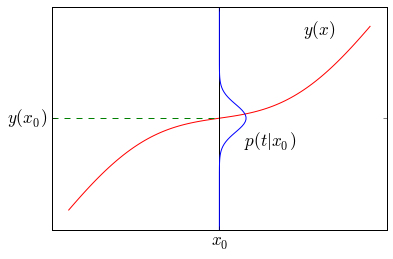

In [3]:
xx = np.linspace(-0.9, 0.9, 100)
yy = 4 * xx - np.sin(xx * np.pi)

fig, ax = plt.subplots()
ax.plot(xx, yy, color="red")

ax.set_xlim(-1, 1)
ax.set_ylim(-4, 4)

ax.set_xticks([0])
ax.set_xticklabels([r'$x_0$'], fontsize="xx-large")
ax.set_yticks([0])
ax.set_yticklabels([r'$y(x_0)$'], fontsize="xx-large")

xx = np.linspace(-4, 4, 100)
yy = norm.pdf(xx, scale=0.5) / 5

ax.plot([-1, 0], [0, 0], "g--")
ax.plot([0, 0], [-4, 4], "k")
ax.plot(yy, xx)

ax.text(0.15, -1, r'$p(t|x_0)$', fontsize="xx-large")
ax.text(0.5, 3, r'$y(x)$', fontsize="xx-large")

plt.show()

我们也可以使用另一种方式得到这个结果。我们对平方项进行展开：

$$
\begin{align}
\{y(\mathbf x)-t\}^2
& = \{y(\mathbf x)-\mathbb E[t|\mathbf x]+
\mathbb E[t|\mathbf x]-t\}^2 \\
& = \{y(\mathbf x)-\mathbb E[t|\mathbf x]\}^2 + 2\{y(\mathbf x)-\mathbb E[t|\mathbf x]\}\{\mathbb E[t|\mathbf x]-t\} + \{\mathbb E[t|\mathbf x]-t\}^2 \\
\end{align}
$$

带入期望公式，并对 $t$ 进行积分：

$$
\mathbb E[L] = 
\int \{y(\mathbf x)-\mathbb E[t|\mathbf x]\}^2 p(\mathbf x) d\mathbf x
+ \int \text{var}[t|\mathbf x]~p(\mathbf x) d\mathbf x
$$

注意到 $y(x)$ 只出现在第一部分，因此，我们为了使其最小，应该有 

$$
y(\mathbf x)=\mathbb E[t|\mathbf x]
$$

回归问题通常也有三种方式：

1. 建模 $p(\mathbf x, t)$，然后计算 $p(\mathbf t|x)$，最后得到 $y(\mathbf x)=\mathbb E[t|\mathbf x]$
- 建模 $p(\mathbf t|x)$，得到 $y(\mathbf x)=\mathbb E[t|\mathbf x]$
- 直接对回归函数 $y(x)$ 建模。

有些情况下，平方误差给出的结果可能会很差。除了平方误差，我们还可以使用其他误差函数，例如 Minkowski 误差（平方误差是 $q=2$ 的特殊情况）：

$$
\mathbb E[L_q] = \iint \left|y(\mathbf x)-t\right|^q p(\mathbf x, t)d\mathbf xdt
$$

有如下的结论：

- $q=2$，最小值在条件均值处取到
- $q=1$，最小值在条件中位数处取到
- $q\rightarrow 0$，最小值在条件众数处取到

将 $y(\mathbf x)$ 看作独立变量，使用变分法对 $y(\mathbf x)$ 求导，驻点应该满足：

$$
\int q \left|y(\mathbf x)-t\right|^{q-1} sign(y(\mathbf x)-t) p(\mathbf x, t) dt = 0
$$

两边同时除以 $p(\mathbf x)$，有

$$
\int_{-\infty}^{y(\mathbf x)} \left|y(\mathbf x)-t\right|^{q-1} p(t|\mathbf x) dt = 
\int_{y(\mathbf x)}^{\infty} \left|y(\mathbf x)-t\right|^{q-1} p(t|\mathbf x) dt
$$

当 $q = 1$ 时，我们有

$$
\int_{-\infty}^{y(\mathbf x)} p(t|\mathbf x) dt = 
\int_{y(\mathbf x)}^{\infty} p(t|\mathbf x) dt
$$

所以 $y(x)$ 是条件中位数。

当 $q\rightarrow 0$ 时，除了 $t=y(\mathbf x)$ 附近的一小块区域趋近于 0，其他的 $\left|y(\mathbf x)-t\right|^{q} \rightarrow 1$，因此 $\mathbb E[L]$ 趋近于 $1$，减去 $t=y(\mathbf x)$ 附近的一小块区域，因此，对于任意 $\mathbf x$ 值，我们选择 $y(x)$ 取最大的 $p(t|\mathbf x)$ 值能使得减少的值最大。

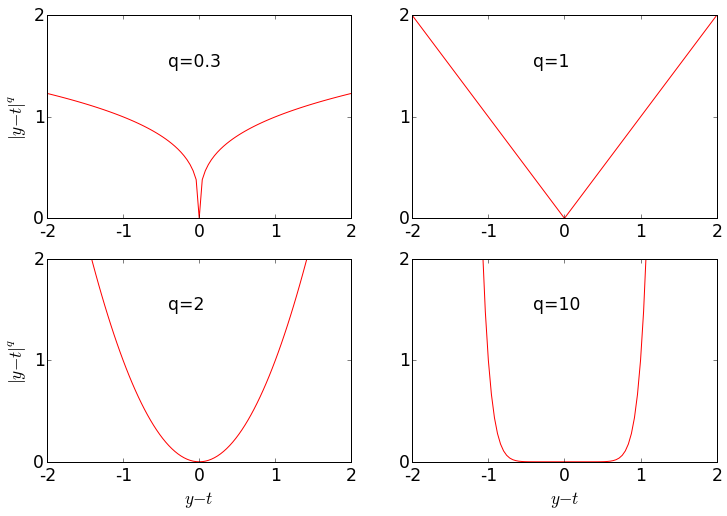

In [4]:
fig, axes = plt.subplots(2, 2, figsize=[12, 8])
axes = axes.flatten()
qs = [0.3, 1, 2, 10]

xx = np.linspace(-2, 2, 101)

for q, ax in zip(qs, axes):
    ax.plot(xx, np.abs(xx) ** q, 'r')
    ax.set_ylim(0, 2)
    ax.set_xticks([-2, -1, 0, 1, 2])
    ax.set_xticklabels([-2, -1, 0, 1, 2], fontsize="xx-large")
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels([0, 1, 2], fontsize="xx-large")
    if q in (10, 2):
        ax.set_xlabel("$y-t$", fontsize="xx-large")
    if q in (2, 0.3):
        ax.set_ylabel("$|y-t|^q$", fontsize="xx-large")
    ax.text(-.4, 1.5, "q={}".format(q), fontsize="xx-large")
    
plt.show()